### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import string
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

### Insert True and Fake Dataset

In [2]:
# Membaca dataset

true = pd.read_csv("Dataset_UAS/True.csv")
fake = pd.read_csv("Dataset_UAS/Fake.csv")

In [3]:
# Melihat informasi dataset True dan Fake

print(true.info())
print(fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [4]:
true.shape, fake.shape 

((21417, 4), (23481, 4))

In [5]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.shape, true.shape

((23481, 4), (21417, 4))

### Change Categories True and Fake News. 

In [7]:
true["label"] = 1
fake["label"] = 0

### Preperation for Manual Testing  

In [8]:
fake_manual_testing = fake.tail(10)
for i in range(23480,23470,-1):
    fake.drop([i], axis = 0, inplace = True)
true_manual_testing = true.tail(10)
for i in range(21416,21406,-1):
    true.drop([i], axis = 0, inplace = True)

In [9]:
fake.shape, true.shape

((23471, 5), (21407, 5))

In [10]:
true_manual_testing["label"] = 1
fake_manual_testing["label"] = 0

C:\Users\ASUS\AppData\Local\Temp/ipykernel_13320/1764558092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_manual_testing["label"] = 1
C:\Users\ASUS\AppData\Local\Temp/ipykernel_13320/1764558092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_manual_testing["label"] = 0


In [11]:
fake_manual_testing.head(10)

,title,text,subject,date,label
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [12]:
true_manual_testing.head(10)

,title,text,subject,date,label
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


### Merge The Manual Testing Dataframe 

In [13]:
manual_testing = pd.concat([fake_manual_testing,true_manual_testing], axis = 0)
manual_testing.to_csv("manual_testing.csv")

### Merge Fake and True Dataframe

In [14]:
df_marge = pd.concat([fake, true], axis =0 )
df_marge.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


### Drop Columns :"title",  "subject" and "date" and Shuffle Dataframe

In [15]:
df = df_marge.drop(["title", "subject","date"], axis = 1)

In [16]:
df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [17]:
df = df.sample(frac = 1)

In [18]:
df.head()

,text,label
7016,This is pure gold that perfectly demonstrates ...,0
18210,NIAMEY (Reuters) - French and Nigerien troops ...,1
14249,Just what America needs another President who ...,0
14531,Of course anyone on Obama s Team Fundamental ...,0
16169,OUR PREVIOUS REPORT ON JUDGE NAPOLITAN S CLAIM...,0


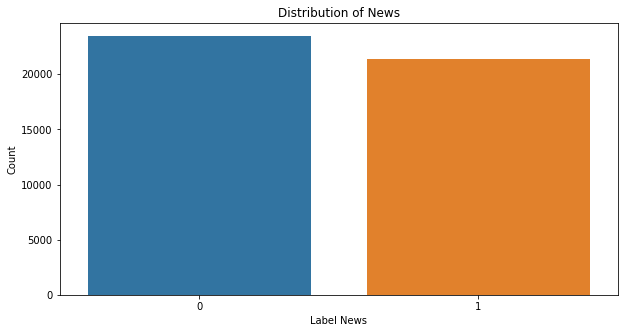

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['label'],data=df)
plt.title("Distribution of News")
plt.xlabel("Label News")
plt.ylabel("Count")
plt.show()

### Clean "Text" Column

In [20]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [21]:
df["text"] = df["text"].apply(wordopt)

In [22]:
df.head()

,text,label
7016,this is pure gold that perfectly demonstrates ...,0
18210,niamey reuters french and nigerien troops ...,1
14249,just what america needs another president who ...,0
14531,of course anyone on obama s team fundamental ...,0
16169,our previous report on judge napolitan s claim...,0


### Split Dataframe x and y

In [23]:
x = df["text"]
y = df["label"]

### Make Train and Test Dataset. 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

### Convert text to vectors

In [25]:
vectorization = TfidfVectorizer()
x_vec_train = vectorization.fit_transform(x_train)
x_vec_test = vectorization.transform(x_test)

### Logistic Regression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(x_vec_train,y_train)

LogisticRegression()

In [27]:
pred_log_reg=log_reg.predict(x_vec_test)

In [28]:
log_reg.score(x_vec_test, y_test)

0.9879679144385026

In [29]:
print(classification_report(y_test, pred_log_reg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2351
           1       0.99      0.99      0.99      2137

    accuracy                           0.99      4488
   macro avg       0.99      0.99      0.99      4488
weighted avg       0.99      0.99      0.99      4488



## Testing Model With Manual Input

#### Using manual_testing Data

In [30]:
def output_lable(n):
    if n == 0:
        return "The News is Fake"
    elif n == 1:
        return "The News is NOT Fake "
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_x_vec_test = vectorization.transform(new_x_test)
    pred_log_reg = log_reg.predict(new_x_vec_test)
    

    return print("\n\nLinear Regression Prediction: {} ". format(output_lable(pred_log_reg[0])))

In [32]:
news = str(input())
manual_testing(news)

21st Century Wire says It s a familiar theme. Whenever there is a dispute or a change of law, and two tribes go to war, there is normally only one real winner after the tribulation  the lawyers. Ars TechnicaIn late 2013, Yahoo was hit with six lawsuits over its practice of using automated scans of e-mail to produce targeted ads. The cases, which were consolidated in federal court, all argued that the privacy rights of non-Yahoo users, who  did not consent to Yahoo s interception and scanning of their emails,  were being violated by a multi-billion dollar company.Now, lawyers representing the plaintiffs are singing a different tune. Last week, they asked US District Judge Lucy Koh to accept a proposed settlement (PDF). Under the proposal, the massive class of non-Yahoo users won t get any payment, but the class lawyers at Girard Gibbs and Kaplan Fox intend to ask for up to $4 million in fees. (The ultimate amount of fees will be up to the judge, but Yahoo has agreed not to oppose any fe